# Data Visualization with Tableau Project

***

## Milestone 2: Importing and Prepping the Data


This milestone focuses on the nuts and bolts of preparing your data for analysis. You will make final decisions about which data to use to support your project, and you will acquire that data, import it into Tableau, and prep it for analysis. 


The purpose of this step is to ensure the data you will be analyzing is 
free of problematic errors that would contaminate your analysis.  As we have noted before, when it comes to the quality of your analytics and visualizations, it truly is “garbage in, garbage out.” Therefore, it is essential the data you choose for this project is of high quality and is free of any problematic cleanliness issues. The character of these issues will vary dramatically from project to project, and it will ultimately be up to you to determine if a perceived outlier in the data is evidence of a problem, or an interesting discovery, or neither. 

You will submit a screenshot of the Data Source page in your Tableau Desktop instance that shows your data has been properly imported and is prepared for analysis. You will also submit an accompanying write-up on any data cleaning steps you took to prepare the data for analysis. 

## Data Tasks

- Extra Space at the end word in department feature, replace with no space
- Missing values in wip, replace with mean score
- Outliers in wip, overtime and incentive features, need to remove them out
- Perform data visualization to find insights
- Set and decide KPIs
-

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine
#from feature_engine import imputation as mdi
from feature_engine.outliers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [ ]:
df = pd.read_csv("garments_worker_productivity.csv",parse_dates=['date'])

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Milestone 3: Exploratory Analysis

## Data Preprocessing

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df['wip'] = df['wip'].replace(np.nan,df['wip'].mean())

In [ ]:
df.isnull().sum()

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["wip"], kde=True)
plt.xlim(0,3000)
plt.ylim(0,60)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["incentive"], kde=True)
plt.xlim(0,600)
plt.ylim(0,100)
plt.show()

In [ ]:
windsorizer = Winsorizer(capping_method='quantiles',tail='right',fold=0.2, variables=["wip","incentive","over_time"])

In [ ]:
windsorizer.fit(df)

In [ ]:
df2 = windsorizer.transform(df)

In [ ]:
df2

In [ ]:
df2.describe()

In [ ]:
windsorizer.left_tail_caps_

In [ ]:
windsorizer.right_tail_caps_

In [ ]:
df2.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df2["prod_diff"] = df2["actual_productivity"] - df2["targeted_productivity"]

In [ ]:
df2.head()

### Save to CSV

In [ ]:
#df2.to_csv("clean.csv", index=False)

## Data Visualization

In [2]:
df = pd.read_csv("clean.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_diff
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.00,6960.00,50.00,0.00,0,0,59.00,0.94,0.14
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.47,960.00,0.00,0.00,0,0,8.00,0.89,0.14
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660.00,50.00,0.00,0,0,30.50,0.80,0.00
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660.00,50.00,0.00,0,0,30.50,0.80,0.00
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.00,1920.00,50.00,0.00,0,0,56.00,0.80,0.00


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["prod_diff"], kde=True)
plt.xlim(-0.75,0.75)
plt.ylim(0,120)
plt.show()

### Groupby Function

In [ ]:
df.groupby('quarter')['actual_productivity'].mean()

In [ ]:
df.groupby('department')['actual_productivity'].mean()

In [ ]:
df.groupby('day')['actual_productivity'].mean()

In [ ]:
df.groupby('team')['actual_productivity'].mean()

In [ ]:
df.prod_diff.value_counts()

### Univariate Data Exploration

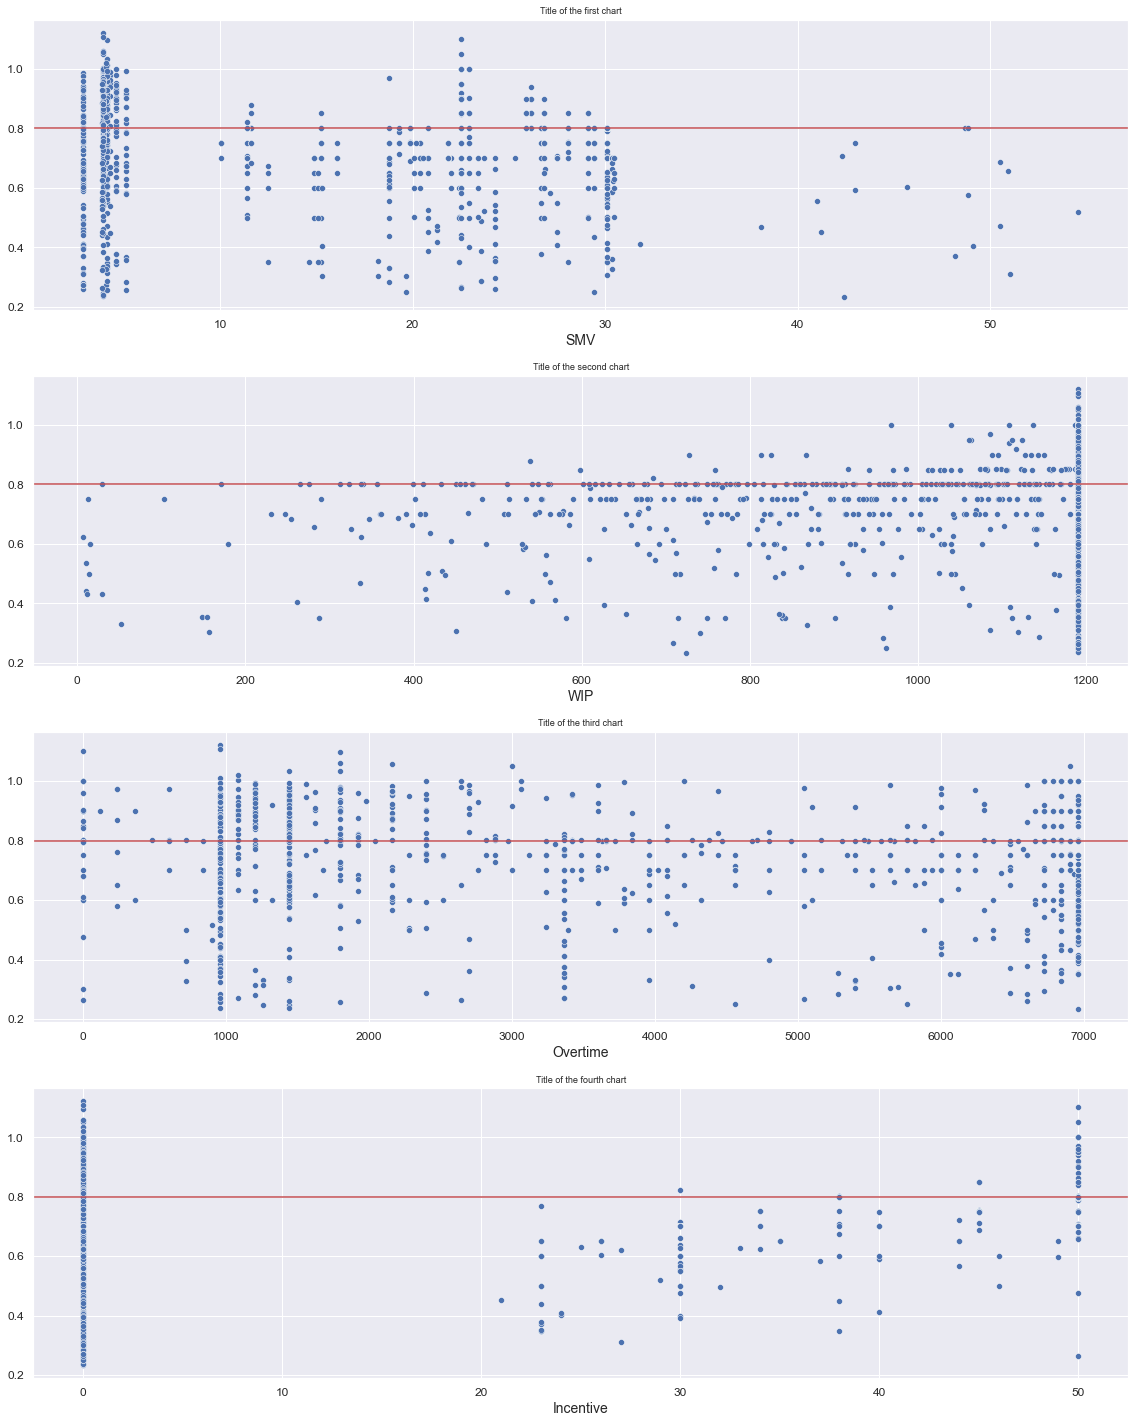

In [8]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, sharey=False, figsize=(16,20))
#fig.suptitle('Main Title')


sns.scatterplot(x="smv", y="actual_productivity", data=df, ax=ax[0], ci=None, sizes=20)
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[0].set_xlabel("SMV")
ax[0].set_ylabel("")

sns.scatterplot(x="wip", y="actual_productivity", data=df, ax=ax[1], ci=None, sizes=20)
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[1].set_xlabel("WIP")
ax[1].set_ylabel("")

sns.scatterplot(x="over_time", y="actual_productivity", data=df, ax=ax[2], ci=None, sizes=20)
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[2].set_xlabel("Overtime")
ax[2].set_ylabel("")

sns.scatterplot(x="incentive", y="actual_productivity", data=df, ax=ax[3], ci=None, sizes=20)
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[3].set_xlabel("Incentive")
ax[3].set_ylabel("")

plt.tight_layout()
plt.show()

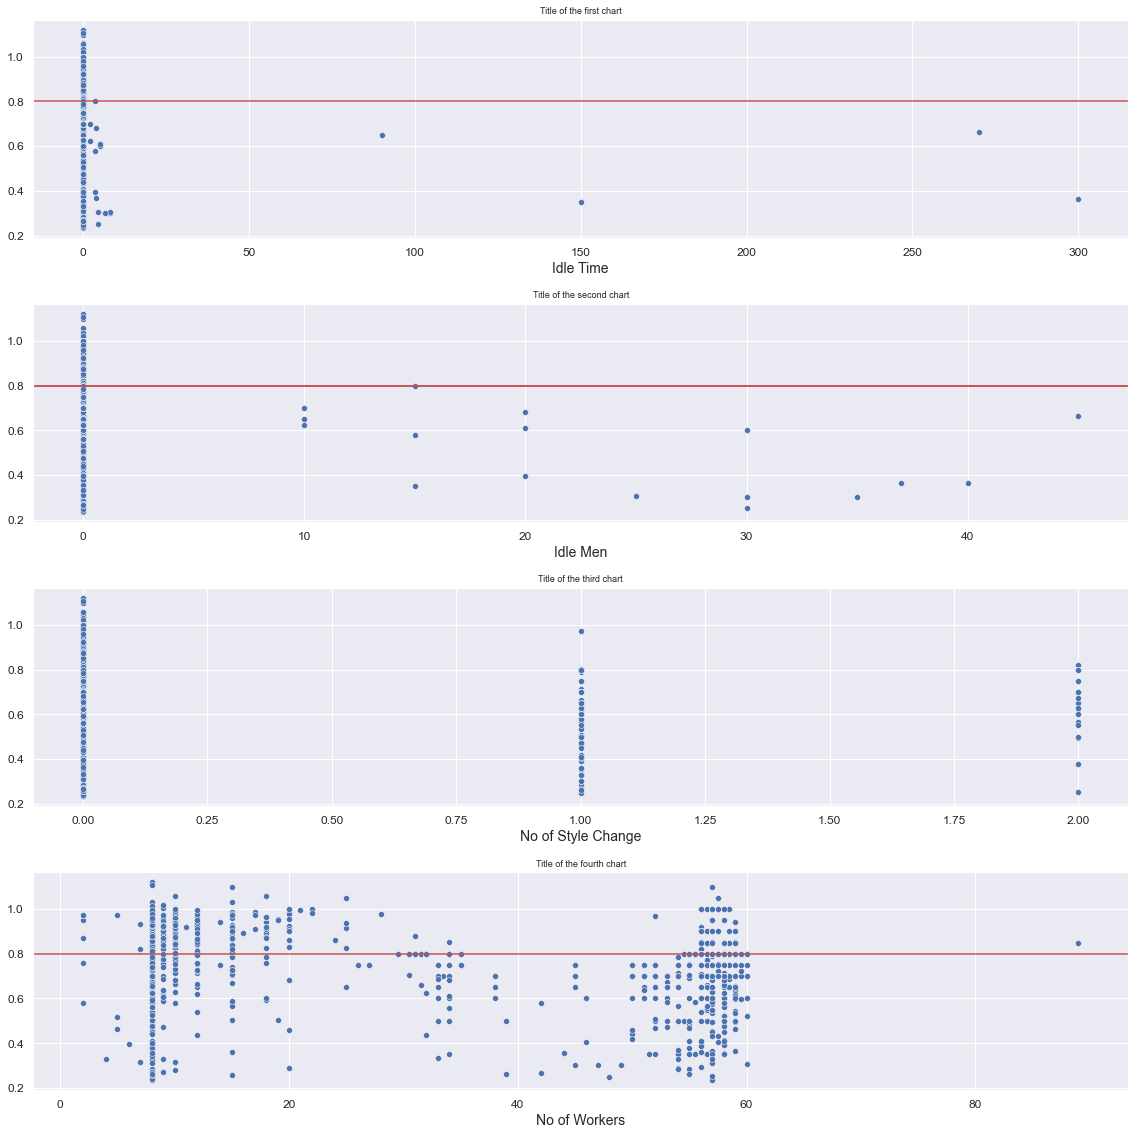

In [9]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, sharey=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.scatterplot(x="idle_time", y="actual_productivity", data=df, ax=ax[0], ci=None, sizes=20)
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[0].set_xlabel("Idle Time")
ax[0].set_ylabel("")

sns.scatterplot(x="idle_men", y="actual_productivity", data=df, ax=ax[1], ci=None, sizes=20)
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[1].set_xlabel("Idle Men")
ax[1].set_ylabel("")

sns.scatterplot(x="no_of_style_change", y="actual_productivity", data=df, ax=ax[2], ci=None, sizes=20)
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[1].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[2].set_xlabel("No of Style Change")
ax[2].set_ylabel("")

sns.scatterplot(x="no_of_workers", y="actual_productivity", data=df, ax=ax[3], ci=None, sizes=20)
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].axhline(y = 0.8, color = 'r', linestyle = '-')
ax[3].set_xlabel("No of Workers")
ax[3].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='actual_productivity',  col = 'quarter',
            kind='box', data=df,
            height = 5, aspect = 1)

g.set_xlabels("Productivity")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('Actual Productivity Quarterly', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='actual_productivity',  col = 'department',
            kind='box', data=df,
            height = 5, aspect = 1)

g.set_xlabels("Productivity")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('Actual Productivity Dept', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='actual_productivity',  col = 'day',
            kind='box', data=df, col_wrap=3,
            height = 5, aspect = 1)

g.set_xlabels("Productivity")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('Actual Productivity Daily', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='actual_productivity',  col = 'team',
            kind='box', data=df, col_wrap=4,
            height = 5, aspect = 1)

g.set_xlabels("Productivity")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('Actual Productivity by Team', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Time-Series Analysis

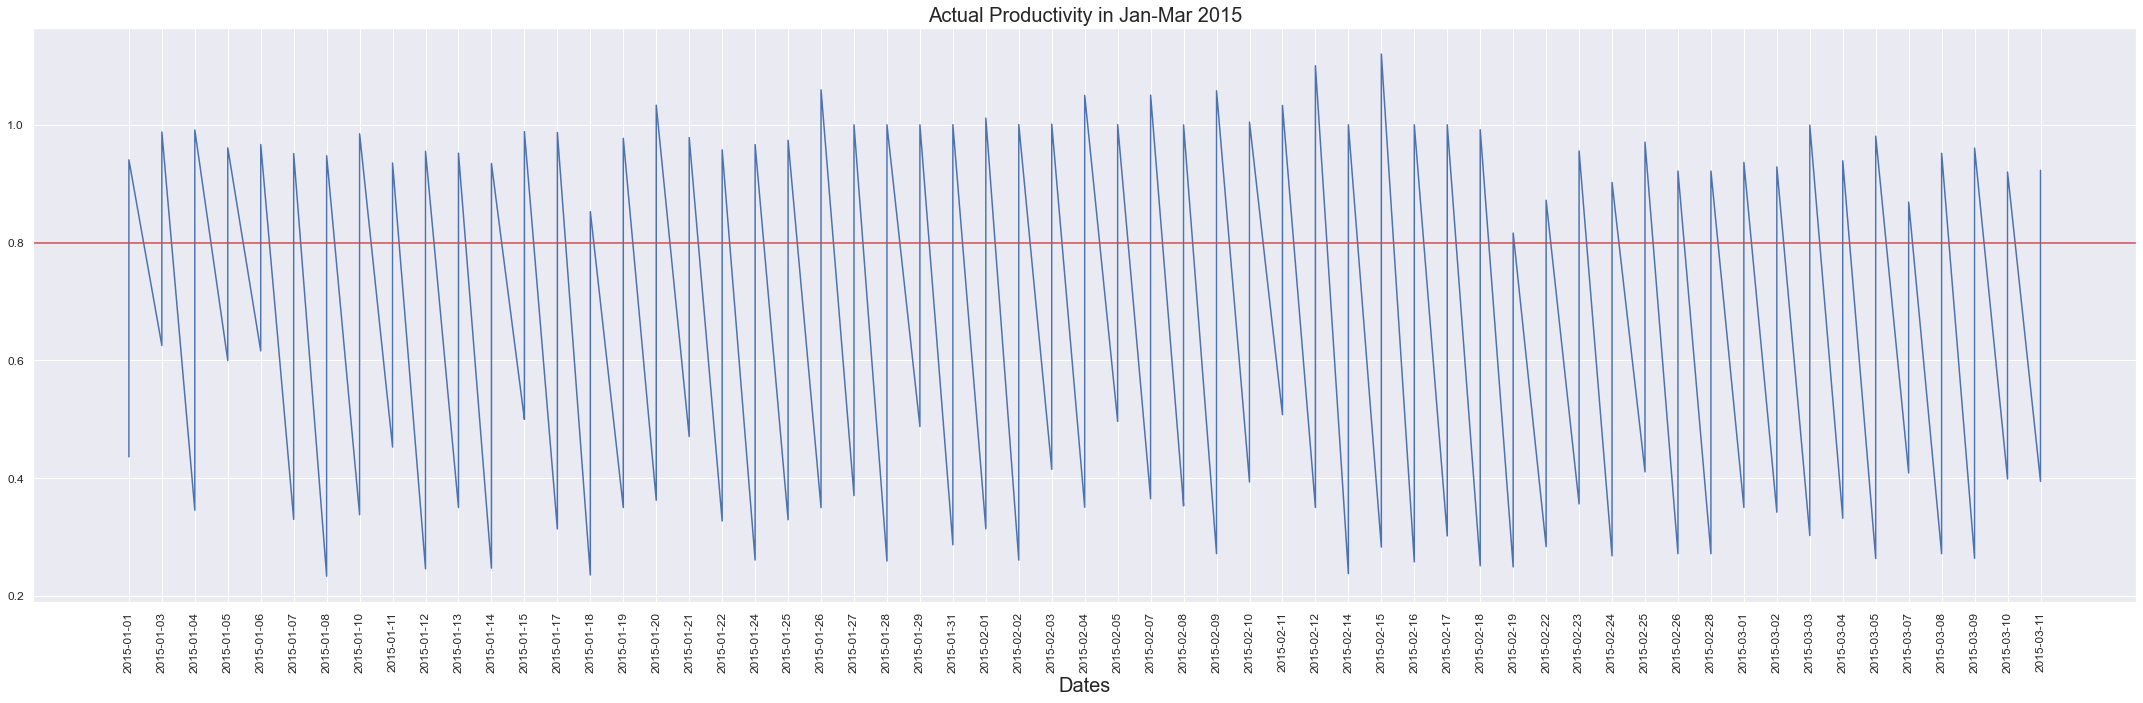

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.actual_productivity, data=df, estimator=None)
plt.title("Actual Productivity in Jan-Mar 2015", fontsize=20)
plt.xlabel("Dates", fontsize=20)
plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.xticks(rotation=90)
plt.ylabel("", fontsize=20)
#plt.legend(['',''])
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

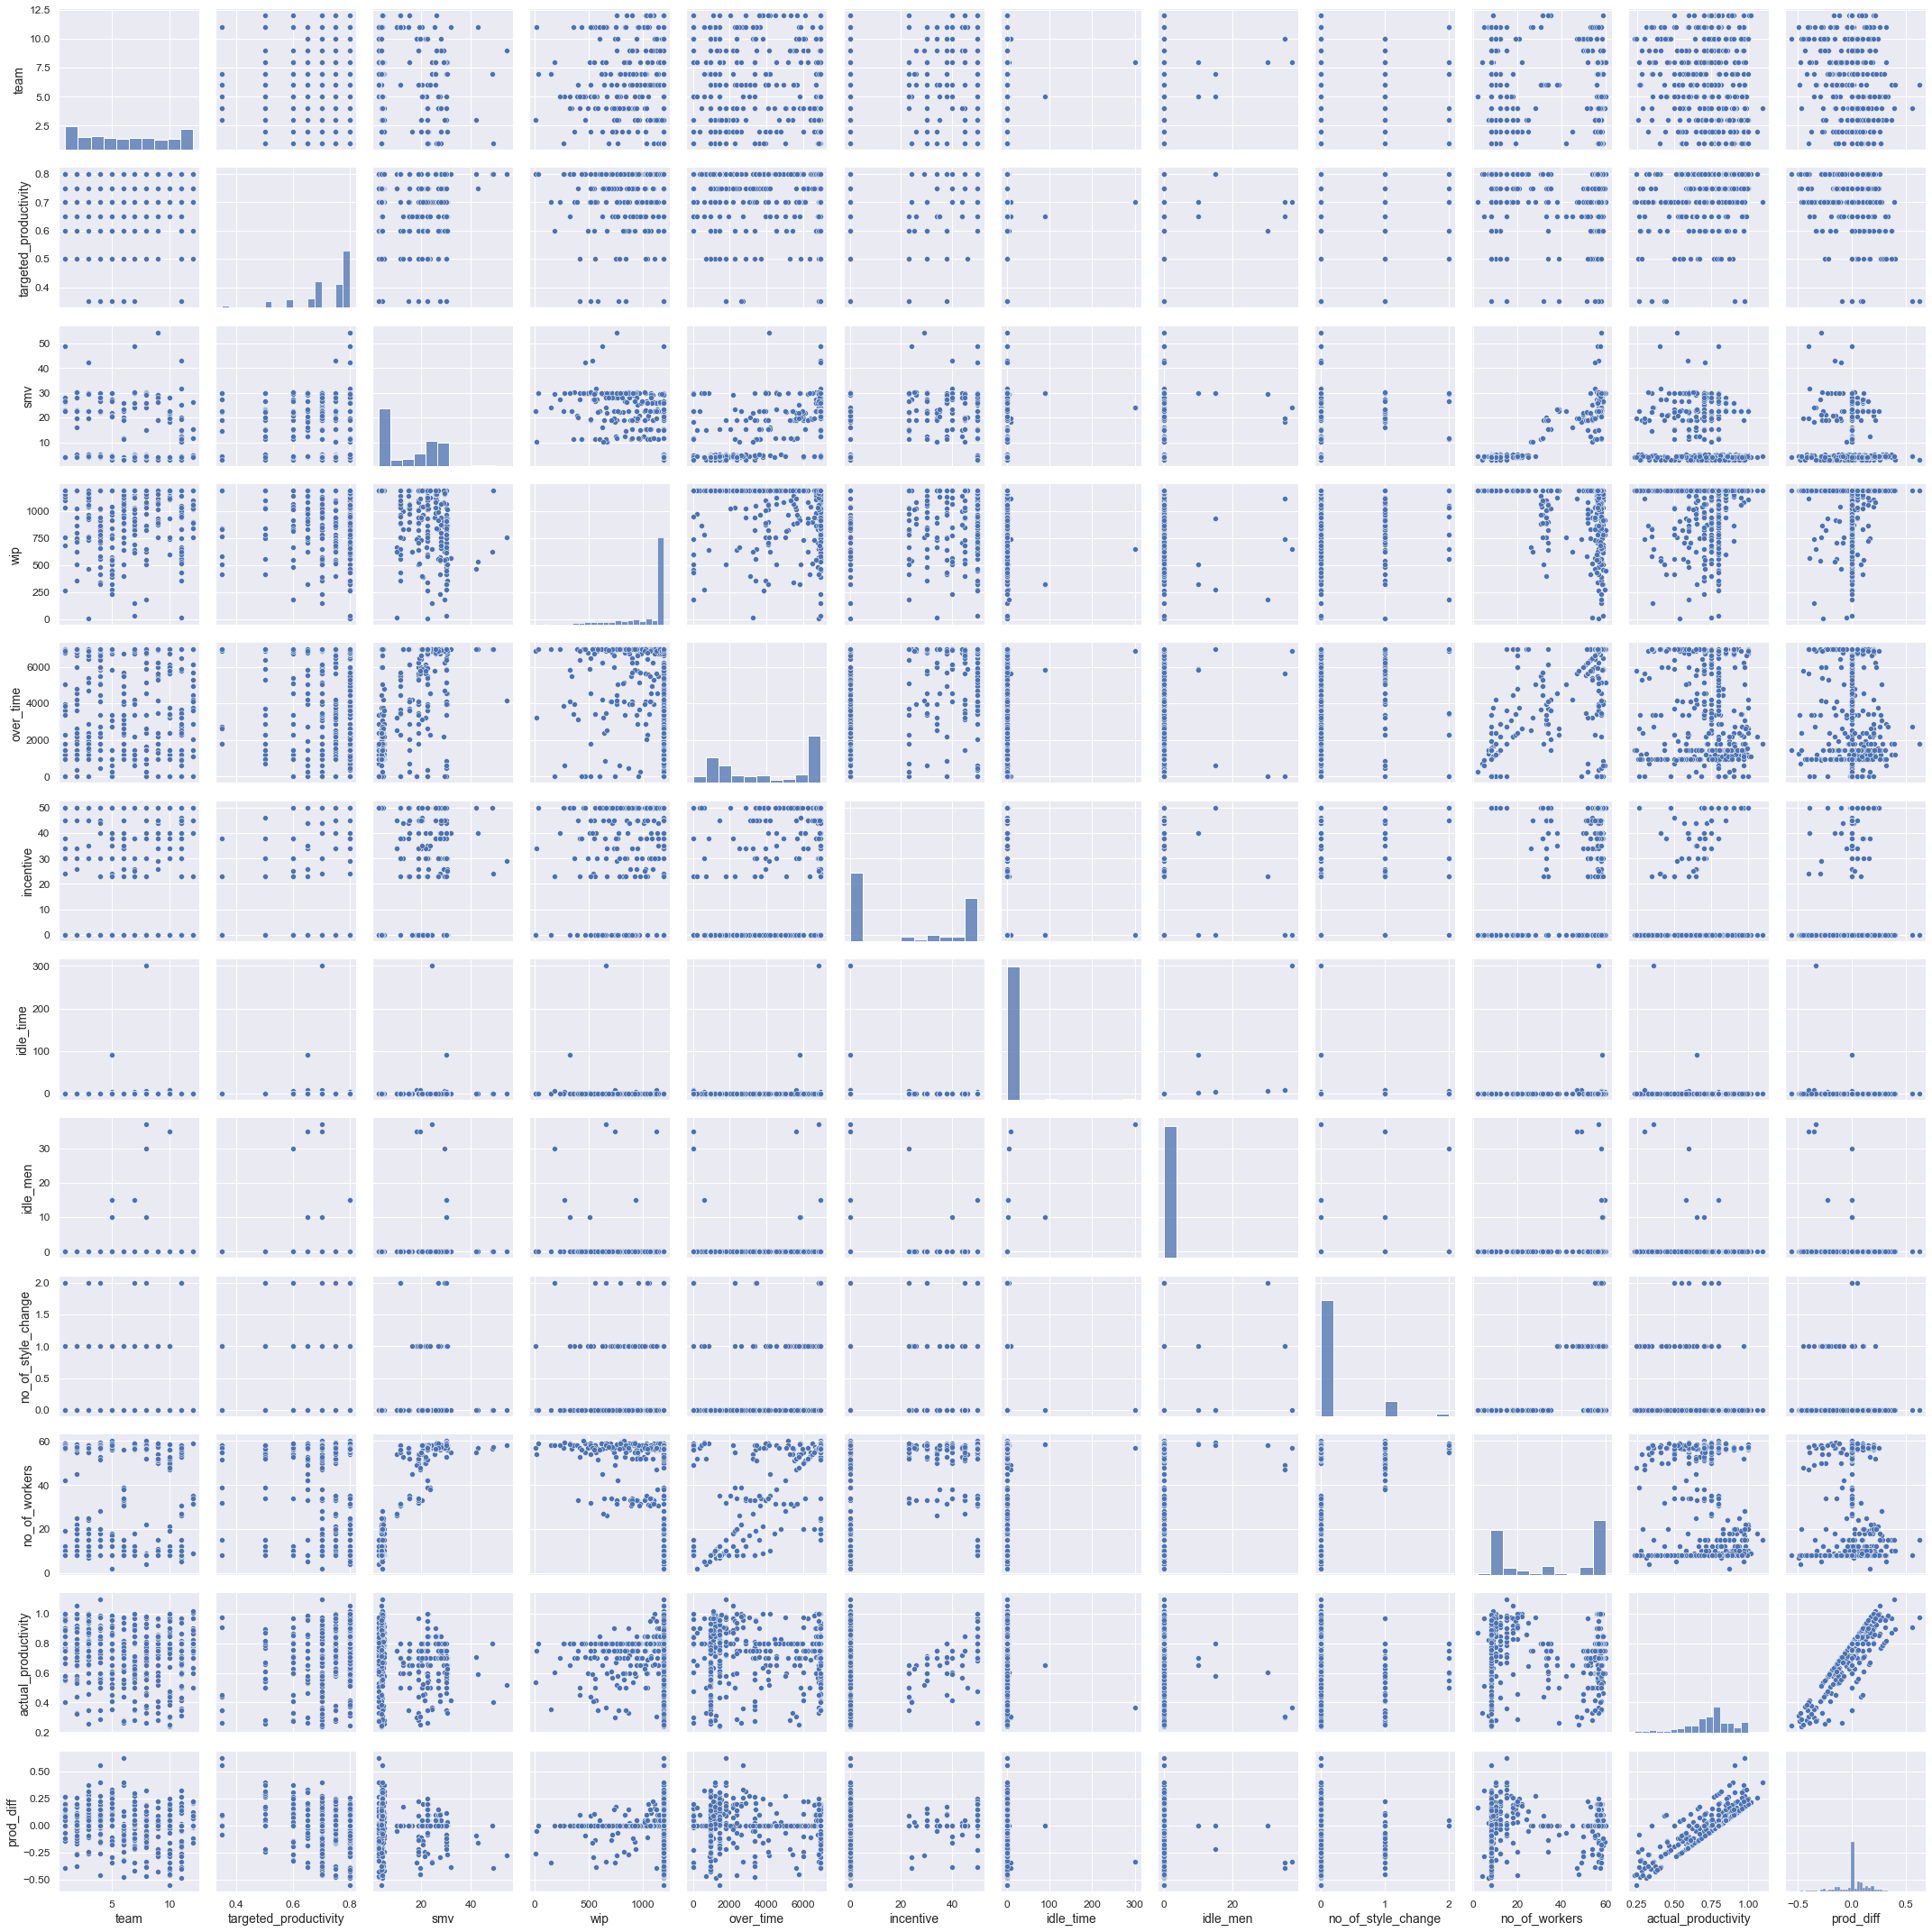

In [12]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))

plt.tight_layout()
plt.show()

## Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Plot 4", size=15)
plt.suptitle('Regression Plots', x=0.5, y=0.9, ha='center', fontsize=20)
plt.show()

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["actual_productivity"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Regression Analysis

### Linear Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(prestige_model, "education")
fig.tight_layout(pad=1.0)

### Linear Regression (SKLearn)

## Logistic Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['']
X = df['']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

### Logistic Regression (SKLearn)

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [ ]:
Counter(y)

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Counter(y_train), Counter(y_test)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

In [ ]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam